In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from StanfordCars import *
from CarsModelClass import *

%matplotlib inline

def create_ROC_Curves(y, ypred, classes=[1,2,3]):
    fpr = dict()
    tpr = dict()
    auc_value = dict()
    
    # --- Binarize the true and preds
    y_true_bin = label_binarize(y, classes)
    #y_pred_bin = label_binarize(ypred, classes)
    #print(y_true_bin.shape)
    
    labels = {
        1: "ROC Curve for Convertibles",
        2: "ROC Curve for Sedans",
        3: "ROC Curve for SUVs/Trucks/Vans",
        4: "ROC Curve for Trucks",
        5: "ROC Curve for Vans"
    }
    
    if len(classes)>3:
        labels[3] = "ROC Curve for SUVs"
    
    # --- Get FPR, TPR & AUC for each class
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:,i], ypred[:,i])
        #print(len(fpr[i]))
        auc_value[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=labels[i+1]+" (area = {:.2f})".format(auc_value[i]),
                 linestyle = ":", lw=3)
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize = 15)
    plt.ylabel('True Positive Rate', fontsize = 15)
    plt.legend(loc="lower right", fontsize=15)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.title("Multi-class ROC for Classifying Car Images: One class vs Rest", fontsize = 18)
    plt.show()

In [22]:
cars_model = cars_model_class(no_of_classes=5)   
Xtrn = cars_model.Xtrain
xtst = cars_model.xtest
Ytrn = cars_model.Ytrain
ytst = cars_model.ytest

cars_PCA = PCA(n_components=500)
Xtrn_500 = cars_PCA.fit_transform(Xtrn)
xtst_500 = cars_PCA.transform(xtst)
print(np.sum(cars_PCA.explained_variance_ratio_))

logreg = LogisticRegression(C=0.01, verbose=True, solver="saga", max_iter=1000, multi_class="multinomial") # C: Inverse of regularization strength; 
logreg.fit(Xtrn_500, Ytrn)

0.9248307336509719


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 84 epochs took 11 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.9s finished


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=True,
                   warm_start=False)

Train Score for the Logit Model: 0.816
Test Score for the Logit Model: 0.785
F1 score for logistic regression: 0.7988771277906526
Confusion matrix: 

 [[850 173   6   2   0]
 [185 777  69   5  10]
 [ 10  88 478  24  19]
 [  0   4  57 269   1]
 [  2  19  18   3 168]]


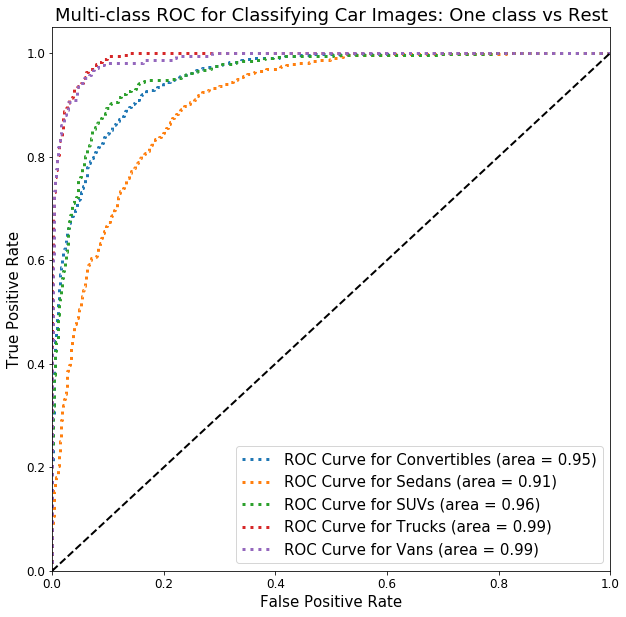

In [23]:
ytest_labels = logreg.predict(xtst_500)
ytest_prob = logreg.predict_proba(xtst_500)
train_score = logreg.score(Xtrn_500, Ytrn)
test_score = logreg.score(xtst_500, ytst)
print("Train Score for the Logit Model: {:.3f}".format(train_score))
print("Test Score for the Logit Model: {:.3f}".format(test_score))
print("F1 score for logistic regression: {}".format(f1_score(ytst, ytest_labels, average="macro")))
print("Confusion matrix: \n\n", confusion_matrix(ytst, ytest_labels))

plt.rcParams['figure.figsize'] = [10, 10]
create_ROC_Curves(ytst, ytest_prob, classes=[1, 2, 3, 4, 5])

/Users/bhanuyerra/Documents/MetisDatScienceBootcamp/Projects/Metis_Prj3/Code/CarsModelClass.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fileNames_df.sort_values(str(int(yfalse)), ascending=True, inplace=True)


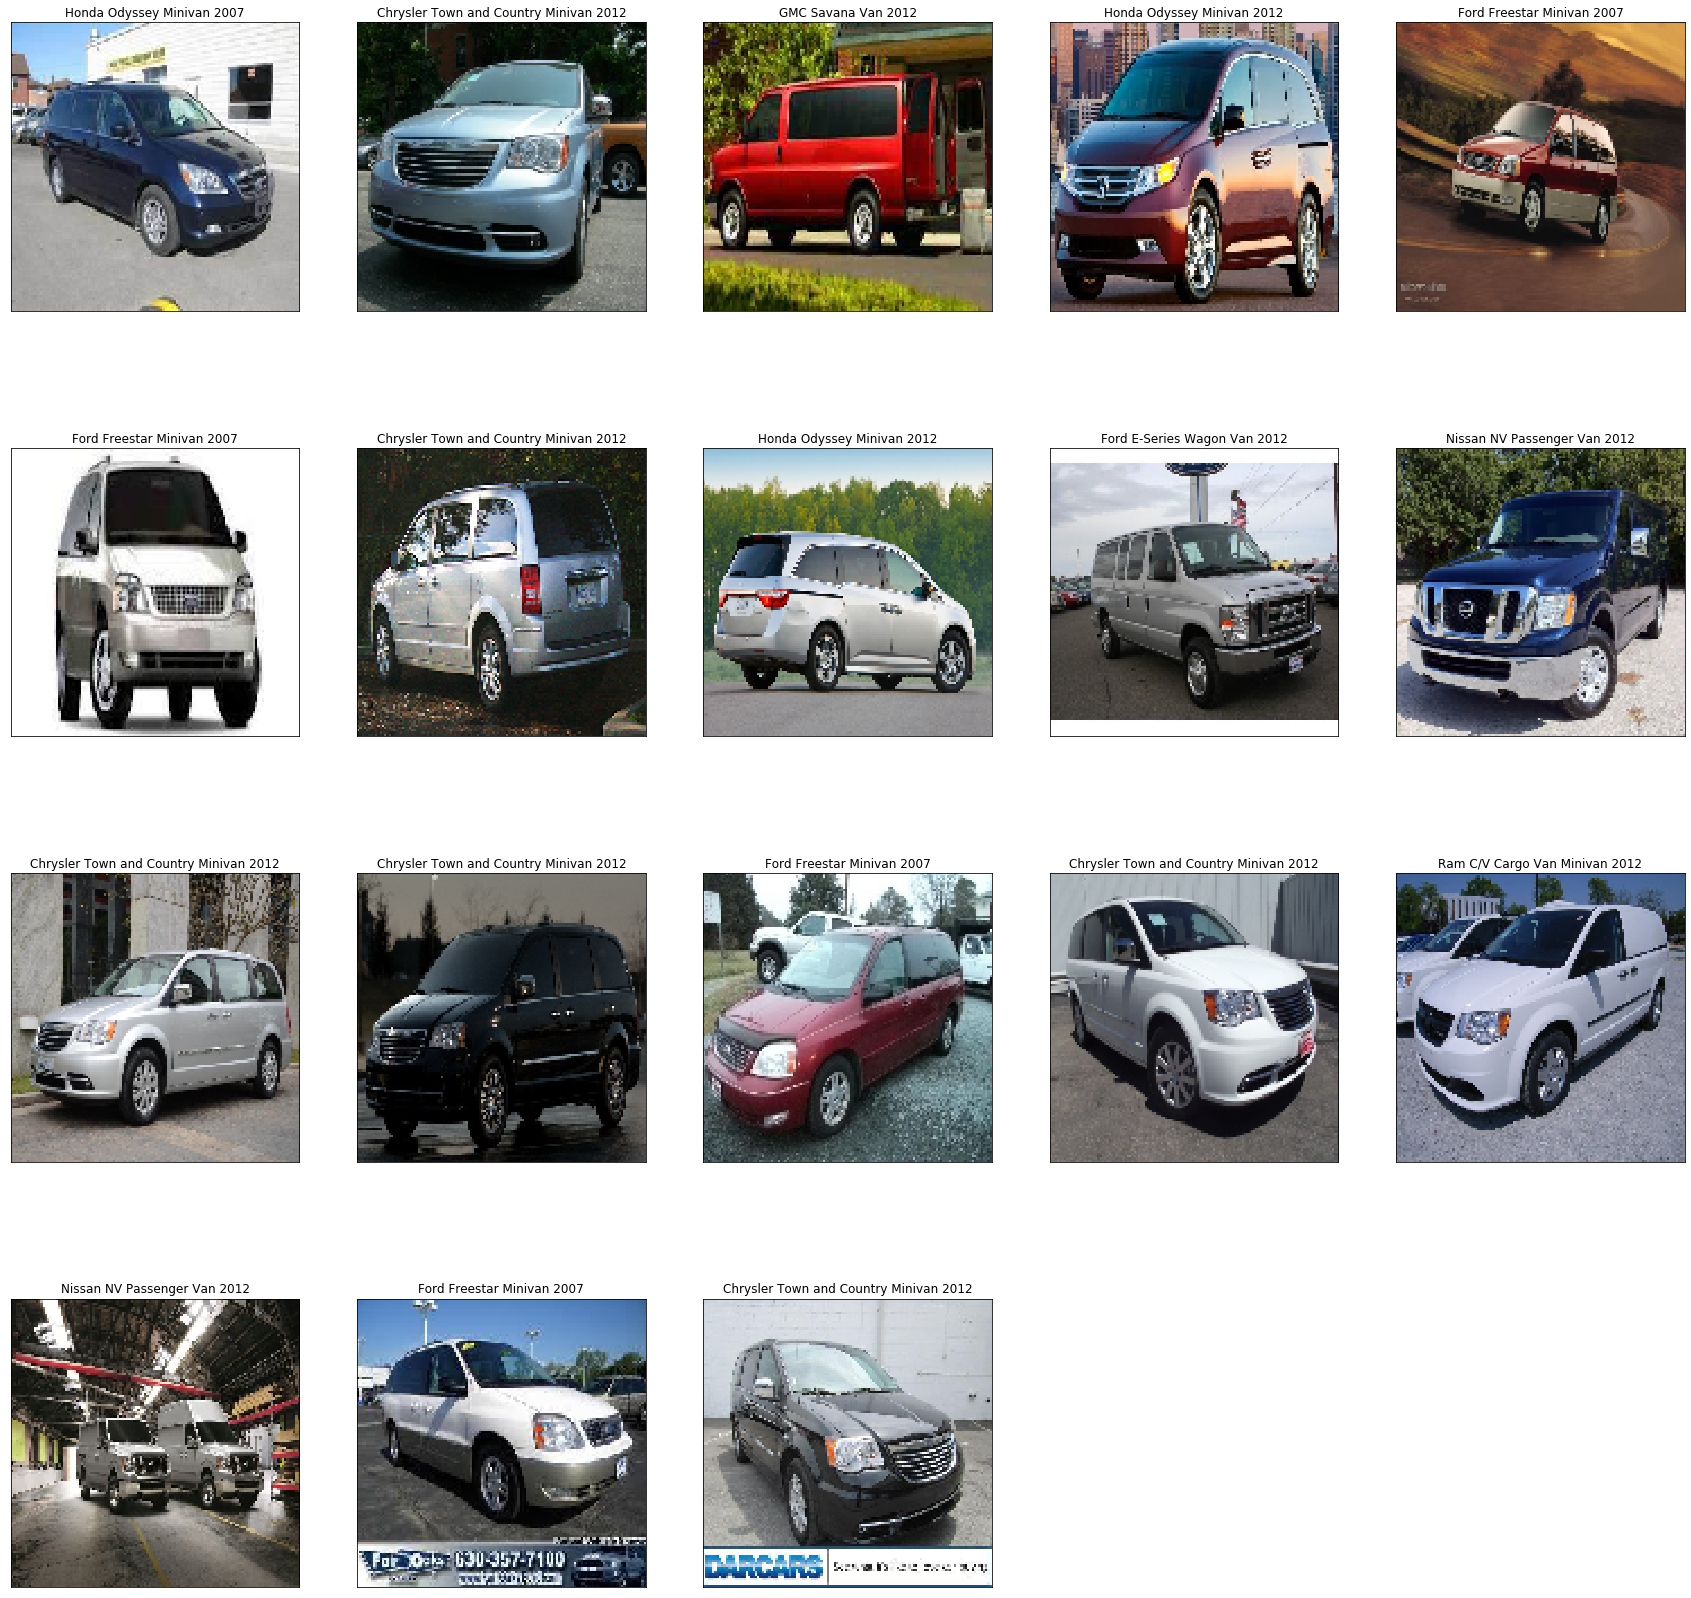

In [24]:
top20_12 = cars_model.get_misclass_topFileNames(ytest_labels, ytest_prob, 5, 3, 30, top=False)
GetStandfordCars().show_select_images(top20_12)

In [25]:
randomforest = RandomForestClassifier(n_estimators=500, max_depth=10, random_state = 333)
randomforest.fit(Xtrn_500, Ytrn)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=333,
                       verbose=0, warm_start=False)

Train Score for the Logit Model: 0.906
Test Score for the Logit Model: 0.679
F1 score for logistic regression: 0.6451997493710764
Confusion matrix: 

 [[786 244   1   0   0]
 [207 818  19   2   0]
 [ 31 232 351   4   1]
 [ 32  30  97 172   0]
 [ 27  87  24   0  72]]


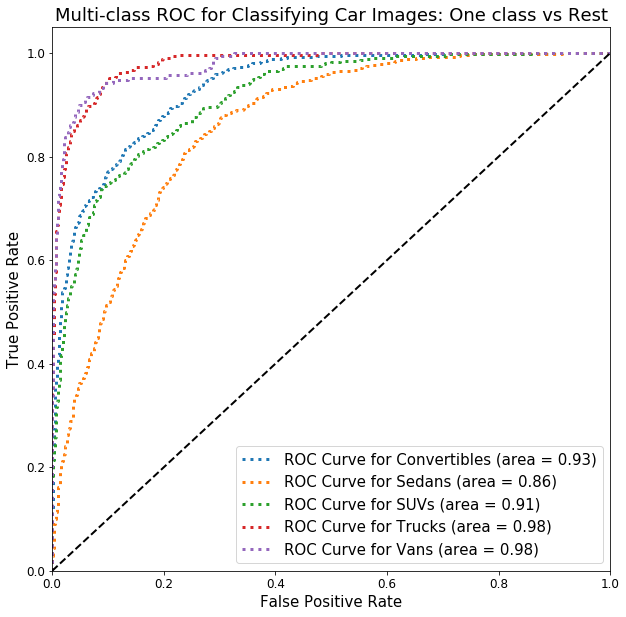

In [27]:
ytl_rf = randomforest.predict(xtst_500)
ytp_rf = randomforest.predict_proba(xtst_500)
train_score_rf = randomforest.score(Xtrn_500, Ytrn)
test_score_rf = randomforest.score(xtst_500, ytst)
print("Train Score for the Logit Model: {:.3f}".format(train_score_rf))
print("Test Score for the Logit Model: {:.3f}".format(test_score_rf))
print("F1 score for logistic regression: {}".format(f1_score(ytst, ytl_rf, average="macro")))
print("Confusion matrix: \n\n", confusion_matrix(ytst, ytl_rf))

plt.rcParams['figure.figsize'] = [10, 10]
create_ROC_Curves(ytst, ytp_rf , classes=[1, 2, 3, 4, 5])

## Stacking Classifier using LogReg & RF

In [29]:
from mlxtend.classifier import StackingClassifier
lr=LogisticRegression()

sclf = StackingClassifier(classifiers=[logreg, randomforest], 
                          meta_classifier=lr, use_probas=True)
sclf.fit(Xtrn_500, Ytrn)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 84 epochs took 10 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.6s finished
//anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


StackingClassifier(average_probas=False,
                   classifiers=[LogisticRegression(C=0.01, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=1000,
                                                   multi_class='multinomial',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='saga', tol=0.0001,
                                                   verbose=True,
                                                   warm_start=False),
                                RandomForestClassifier(bootstrap=True,
                                                       class_weight...
             

Train Score for the Stacking Classifier: 0.951
Test Score for the Stacking Classifier: 0.734
F1 score for Stacking Classifier: 0.7647831141806267
Confusion matrix: 

 [[809 213   8   1   0]
 [273 659  97   6  11]
 [ 20  90 469  19  21]
 [  4   1  55 267   4]
 [  3  14  19   2 172]]


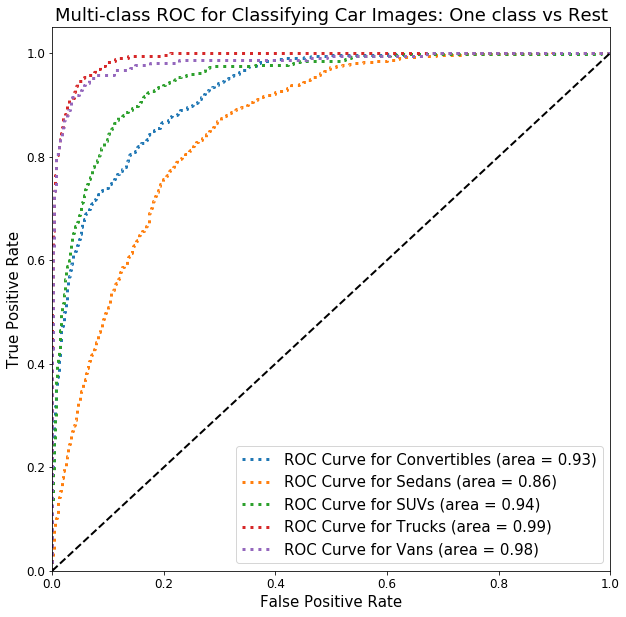

In [30]:
ytl_sclf = sclf.predict(xtst_500)
ytp_sclf = sclf.predict_proba(xtst_500)
train_score_sclf = sclf.score(Xtrn_500, Ytrn)
test_score_sclf = sclf.score(xtst_500, ytst)
print("Train Score for the Stacking Classifier: {:.3f}".format(train_score_sclf))
print("Test Score for the Stacking Classifier: {:.3f}".format(test_score_sclf))
print("F1 score for Stacking Classifier: {}".format(f1_score(ytst, ytl_sclf, average="macro")))
print("Confusion matrix: \n\n", confusion_matrix(ytst, ytl_sclf))

plt.rcParams['figure.figsize'] = [10, 10]
create_ROC_Curves(ytst, ytp_sclf , classes=[1, 2, 3, 4, 5])

## StackingClassifier with LogReg & RF, using Random Oversampling

In [31]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X500_S1, y_S1 = ros.fit_sample(Xtrn_500, Ytrn)

In [32]:
sclf2 = StackingClassifier(classifiers=[logreg, randomforest], 
                          meta_classifier=lr, use_probas=True)
sclf2.fit(X500_S1, y_S1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 59 epochs took 13 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.7s finished
//anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


StackingClassifier(average_probas=False,
                   classifiers=[LogisticRegression(C=0.01, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=1000,
                                                   multi_class='multinomial',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='saga', tol=0.0001,
                                                   verbose=True,
                                                   warm_start=False),
                                RandomForestClassifier(bootstrap=True,
                                                       class_weight...
             

Train Score for the Stacking Classifier: 0.975
Test Score for the Stacking Classifier: 0.748
F1 score for Stacking Classifier: 0.7724386040380082
Confusion matrix: 

 [[822 200   6   2   1]
 [246 671 101  10  18]
 [ 15  79 484  20  21]
 [  2   1  57 268   3]
 [  2  12  20   1 175]]


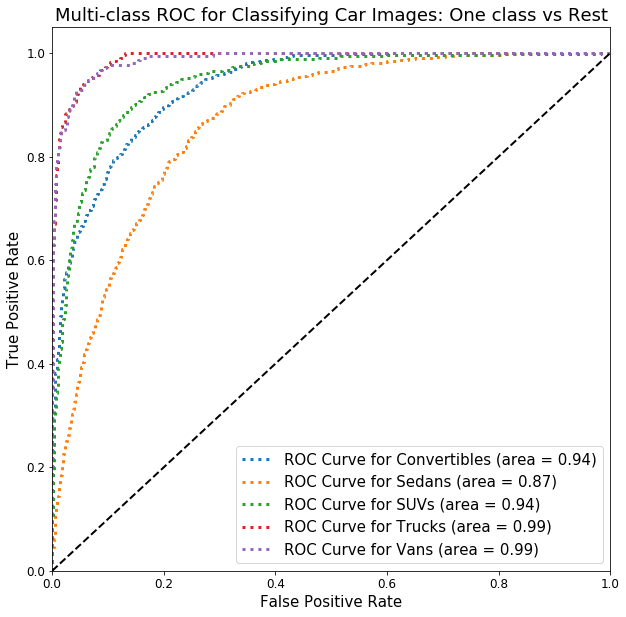

In [34]:
ytl_sclf2 = sclf2.predict(xtst_500)
ytp_sclf2 = sclf2.predict_proba(xtst_500)
train_score_sclf2 = sclf2.score(X500_S1, y_S1)
test_score_sclf2 = sclf2.score(xtst_500, ytst)
print("Train Score for the Stacking Classifier: {:.3f}".format(train_score_sclf2))
print("Test Score for the Stacking Classifier: {:.3f}".format(test_score_sclf2))
print("F1 score for Stacking Classifier: {}".format(f1_score(ytst, ytl_sclf2, average="macro")))
print("Confusion matrix: \n\n", confusion_matrix(ytst, ytl_sclf2))

plt.rcParams['figure.figsize'] = [10, 10]
create_ROC_Curves(ytst, ytp_sclf2 , classes=[1, 2, 3, 4, 5])

In [39]:
cars_svc = SVC(kernel='poly', gamma='auto', probability=True, verbose=True)
cars_svc.fit(Xtrn_500, Ytrn)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=True)

Train Score for the Logit Model: 0.613
Test Score for the Logit Model: 0.593
F1 score for logistic regression: 0.5767572595977901
Confusion matrix: 

 [[ 493  538    0    0    0]
 [  30 1014    1    0    1]
 [   2  444  167    2    4]
 [   1  133   44  153    0]
 [   0   96   20    0   94]]


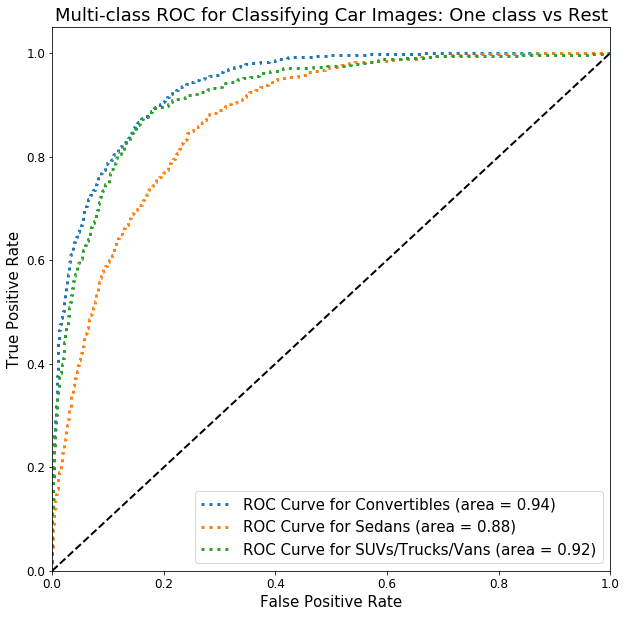

In [41]:
ytl_svc = cars_svc.predict(xtst_500)
ytp_svc = cars_svc.predict_proba(xtst_500)
train_score_svc = cars_svc.score(Xtrn_500, Ytrn)
test_score_svc = cars_svc.score(xtst_500, ytst)
print("Train Score for the Logit Model: {:.3f}".format(train_score_svc))
print("Test Score for the Logit Model: {:.3f}".format(test_score_svc))
print("F1 score for logistic regression: {}".format(f1_score(ytst, ytl_svc, average="macro")))
print("Confusion matrix: \n\n", confusion_matrix(ytst, ytl_svc))

plt.rcParams['figure.figsize'] = [10, 10]
create_ROC_Curves(ytst, ytp_svc)

In [48]:
from sklearn.linear_model import LogisticRegressionCV

cars_lrcv = LogisticRegressionCV(Cs=[0.0001, 0.01, 1, 100, 10000], cv=5, penalty='l2', solver='sag', max_iter = 1000, \
                                 verbose=True, multi_class = "multinomial", random_state = 333)
cars_lrcv.fit(Xtrn_500, Ytrn)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
convergence after 13 epochs took 1 seconds
convergence after 46 epochs took 5 seconds
convergence after 621 epochs took 58 seconds
max_iter reached after 91 seconds


//anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 92 seconds
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
convergence after 15 epochs took 2 seconds
convergence after 40 epochs took 3 seconds
convergence after 562 epochs took 50 seconds
max_iter reached after 86 seconds


//anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 86 seconds
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
convergence after 14 epochs took 2 seconds
convergence after 41 epochs took 3 seconds
convergence after 549 epochs took 48 seconds
max_iter reached after 86 seconds


//anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 87 seconds
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
convergence after 14 epochs took 1 seconds
convergence after 43 epochs took 4 seconds
convergence after 775 epochs took 67 seconds
max_iter reached after 87 seconds


//anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 86 seconds
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
convergence after 12 epochs took 1 seconds
convergence after 41 epochs took 3 seconds
convergence after 627 epochs took 54 seconds
max_iter reached after 86 seconds


//anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 85 seconds


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 19.6min finished


LogisticRegressionCV(Cs=[0.0001, 0.01, 1, 100, 10000], class_weight=None, cv=5,
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=1000, multi_class='multinomial',
                     n_jobs=None, penalty='l2', random_state=333, refit=True,
                     scoring=None, solver='sag', tol=0.0001, verbose=True)

Train Score for the Logit Model: 0.817
Test Score for the Logit Model: 0.787
F1 score for logistic regression: 0.7996969467350302
Confusion matrix: 

 [[850 173   6   2   0]
 [178 784  68   6  10]
 [ 11  88 478  23  19]
 [  1   4  56 269   1]
 [  3  19  18   3 167]]


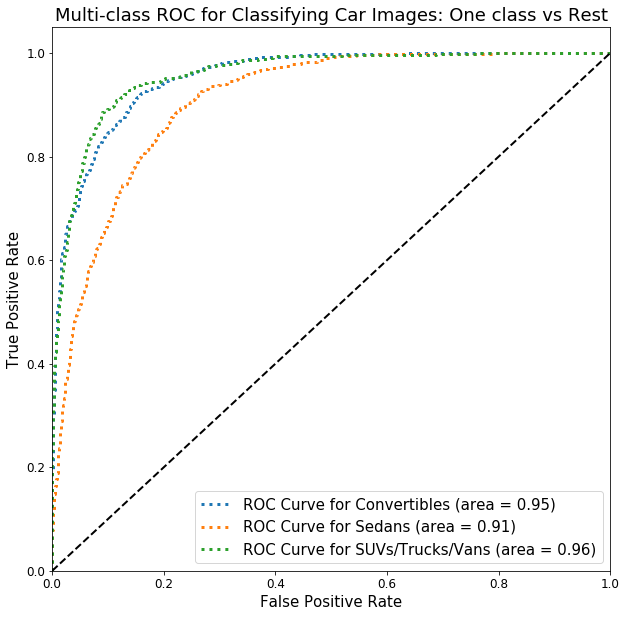

In [49]:
ytest_labels_lrcv = cars_lrcv.predict(xtst_500)
ytest_prob_lrcv = cars_lrcv.predict_proba(xtst_500)
train_score_lrcv = cars_lrcv.score(Xtrn_500, Ytrn)
test_score_lrcv = cars_lrcv.score(xtst_500, ytst)
print("Train Score for the Logit Model: {:.3f}".format(train_score_lrcv))
print("Test Score for the Logit Model: {:.3f}".format(test_score_lrcv))
print("F1 score for logistic regression: {}".format(f1_score(ytst, ytest_labels_lrcv, average="macro")))
print("Confusion matrix: \n\n", confusion_matrix(ytst, ytest_labels_lrcv))

plt.rcParams['figure.figsize'] = [10, 10]
create_ROC_Curves(ytst, ytest_prob_lrcv)

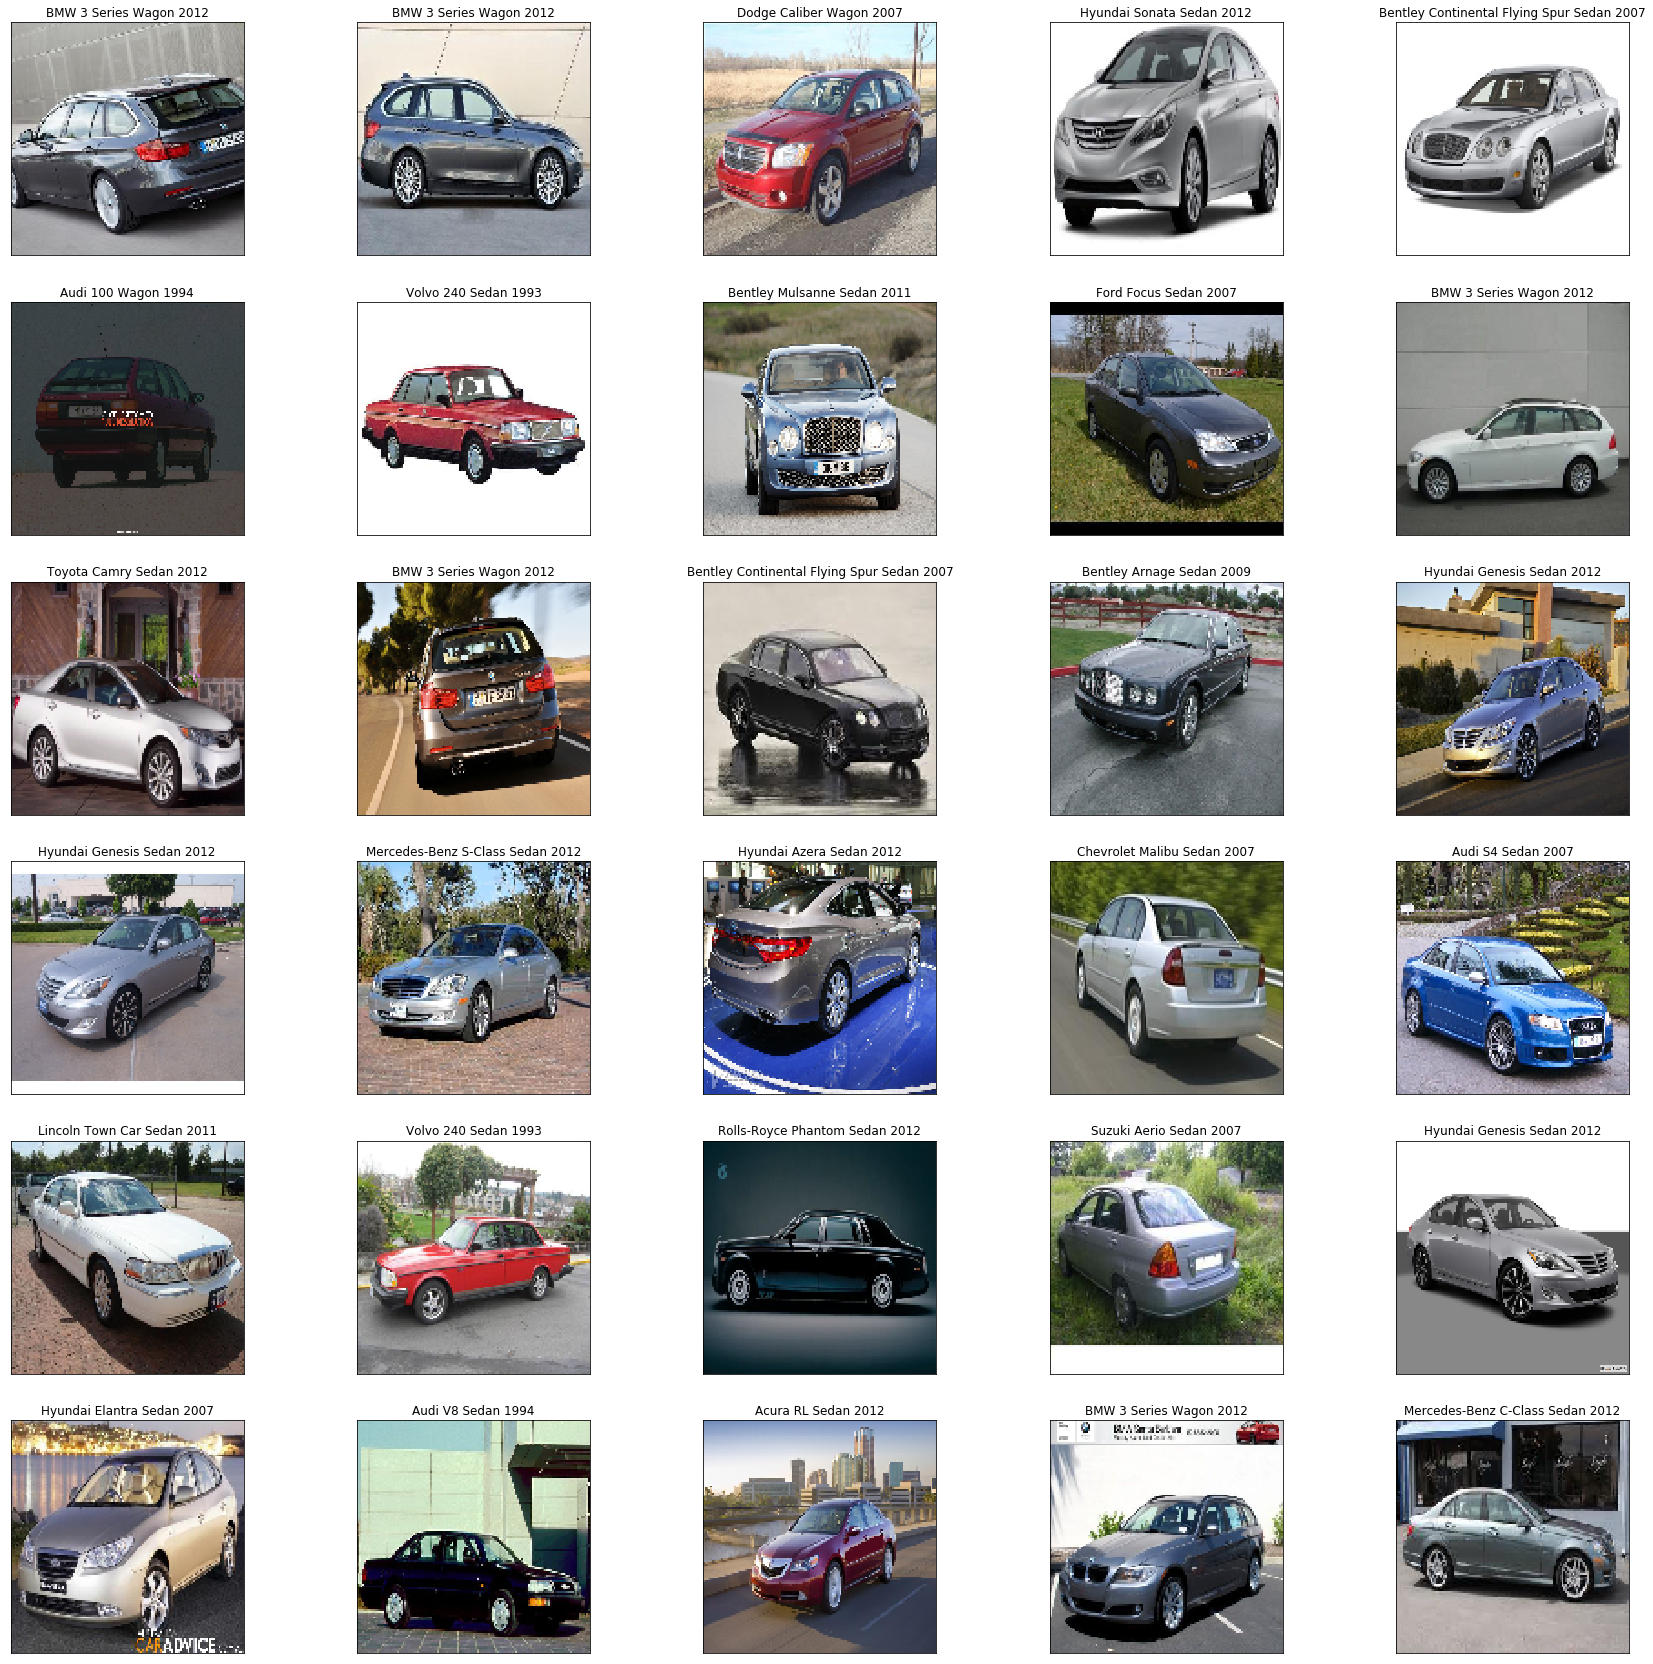

In [64]:
top20_lrcv = cars_model.get_misclass_topFileNames(ytest_labels, ytest_prob_lrcv, 2, 2, 30)
GetStandfordCars().show_select_images(top20_lrcv)

In [66]:
cars_lrcv.C_

array([0.01, 0.01, 0.01, 0.01, 0.01])

In [65]:
dump(logreg, "../Models/MobileNetV2/LogReg_wPCA_Model2_5Class.joblib")
dump(cars_svc, "../Models/MobileNetV2/SVC1_wPCA_Model2_5Class.joblib")
dump(randomforest, "../Models/MobileNetV2/RFq_wPCA_Model2_5Class.joblib")
dump(cars_lrcv, "../Models/MobileNetV2/LRCV_wPCA_Model2_5Class.joblib")

['../Models/MobileNetV2/LRCV_wPCA_Model2_5Class.joblib']

## Trying Oversamping Techniques

In [4]:
cars_model = cars_model_class(no_of_classes=5)   
Xtrn = cars_model.Xtrain
xtst = cars_model.xtest
Ytrn = cars_model.Ytrain
ytst = cars_model.ytest

cars_PCA = PCA(n_components=500)
Xtrn_500 = cars_PCA.fit_transform(Xtrn)
xtst_500 = cars_PCA.transform(xtst)
print(np.sum(cars_PCA.explained_variance_ratio_))

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X500_S1, y_S1 = ros.fit_sample(Xtrn_500, Ytrn)

0.9248946813965452


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 60 epochs took 14 seconds
Train Score for the Logit Model: 0.816
Test Score for the Logit Model: 0.777
F1 score for logistic regression: 0.7895468095513835
Confusion matrix: 

 [[838 173  13   6   1]
 [186 722  98  12  28]
 [  7  57 484  43  28]
 [  0   2  38 285   6]
 [  3   8  12   1 186]]


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.0s finished


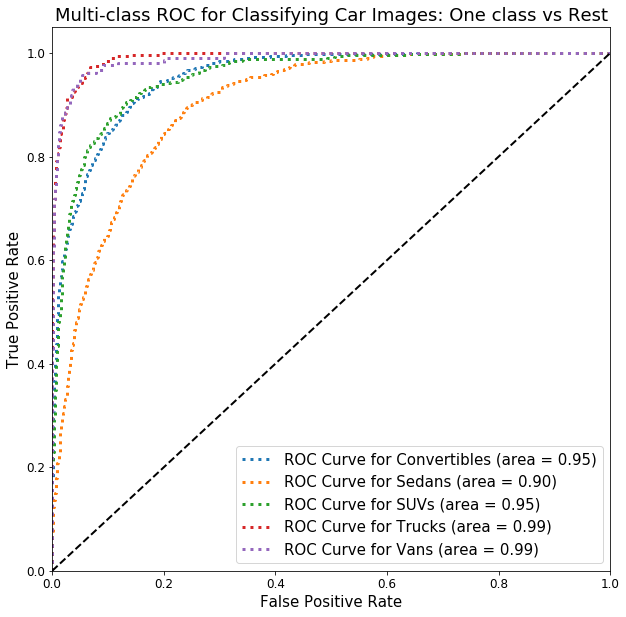

In [20]:
# --- S1: radom sample, S2: SMOTE, S3: ADASYN

logreg_S1 = LogisticRegression(C=0.01, verbose=True, solver="saga", multi_class = "multinomial", max_iter=1000) # C: Inverse of regularization strength; 
logreg_S1.fit(X500_S1, y_S1)

ytest_labels_lrS1 = logreg_S1.predict(xtst_500)
ytest_prob_lrS1 = logreg_S1.predict_proba(xtst_500)
train_score_lrS1 = logreg_S1.score(Xtrn_500, Ytrn)
test_score_lrS1 = logreg_S1.score(xtst_500, ytst)
print("Train Score for the Logit Model: {:.3f}".format(train_score_lrS1))
print("Test Score for the Logit Model: {:.3f}".format(test_score_lrS1))
print("F1 score for logistic regression: {}".format(f1_score(ytst, ytest_labels_lrS1, average="macro")))
print("Confusion matrix: \n\n", confusion_matrix(ytst, ytest_labels_lrS1))

plt.rcParams['figure.figsize'] = [10, 10]
create_ROC_Curves(ytst, ytest_prob_lrS1, classes=[1, 2, 3, 4, 5])

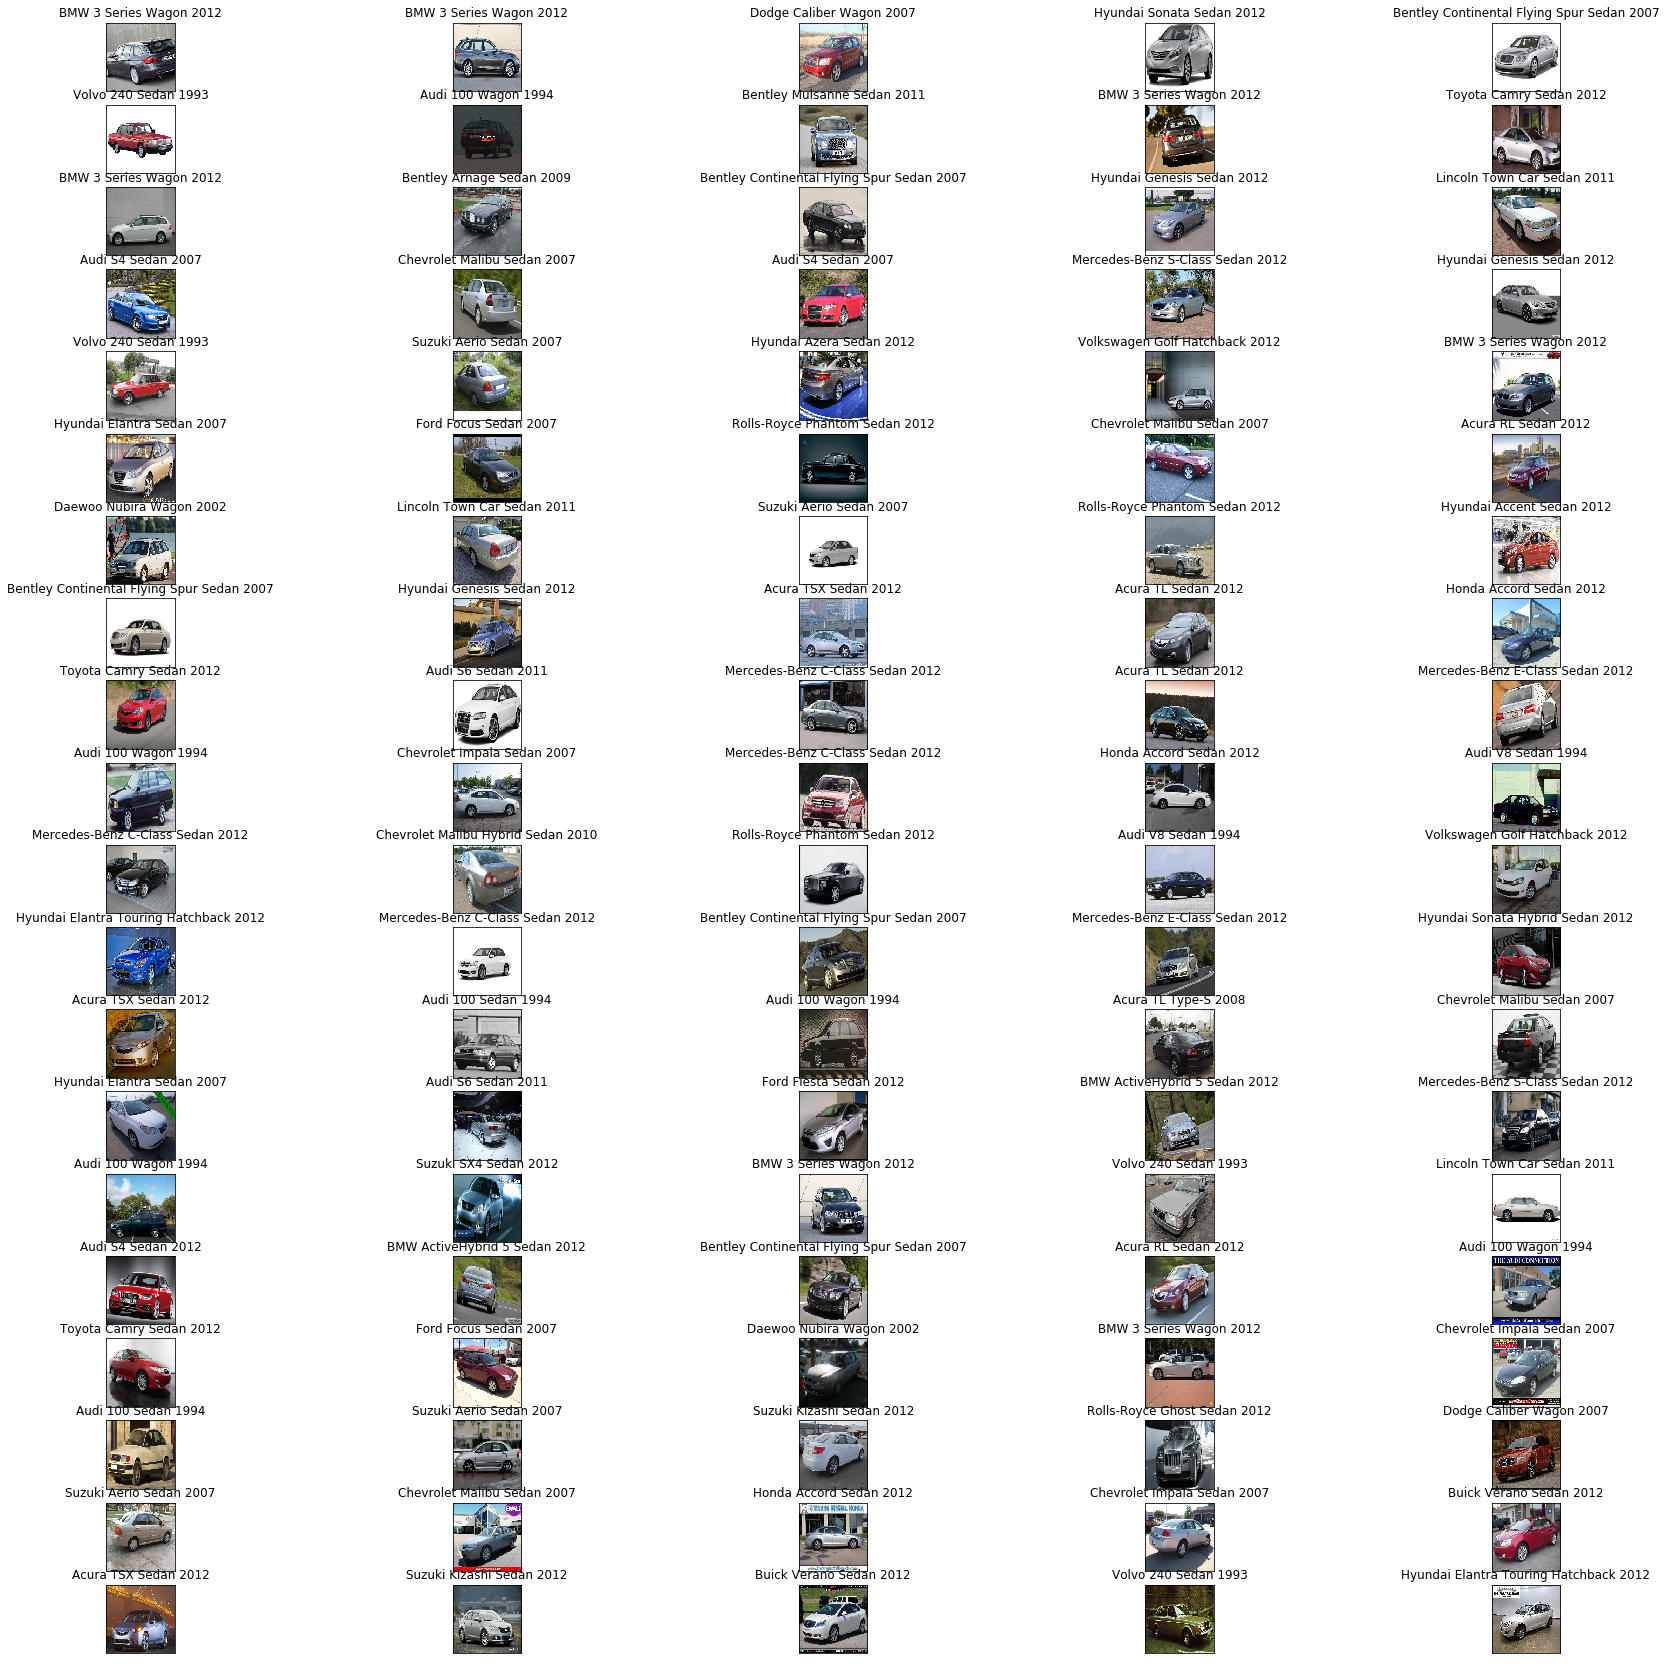

In [23]:
top20_lrS1 = cars_model.get_misclass_topFileNames(ytest_labels_lrS1, ytest_prob_lrS1, 2, 2, 100)
GetStandfordCars().show_select_images(top20_lrS1)

Train Score for the Logit Model: 0.951
Test Score for the Logit Model: 0.732
F1 score for logistic regression: 0.7520922360707625
Confusion matrix: 

 [[799 216  10   4   2]
 [217 681 121  10  17]
 [ 26  89 447  36  21]
 [  4   0  46 276   5]
 [  0  11  26   7 166]]


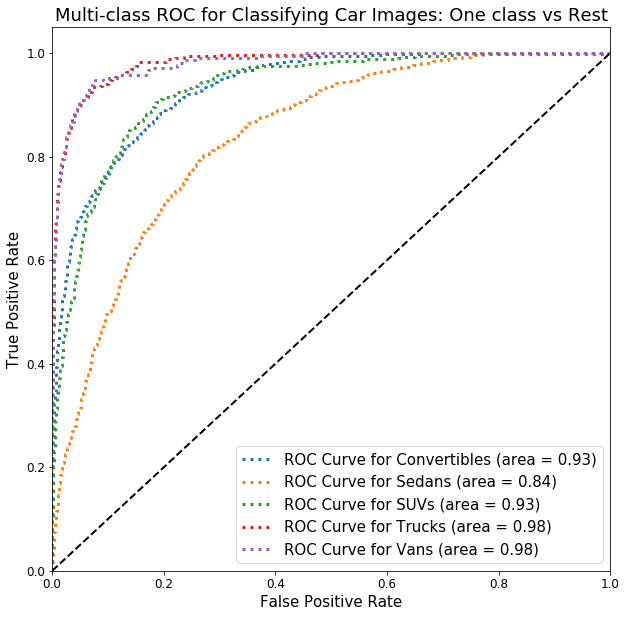

In [24]:
randomforest_S1 = RandomForestClassifier(n_estimators=500, max_depth=10, random_state = 333)
randomforest_S1.fit(X500_S1, y_S1)

ytest_labels_rfS1 = randomforest_S1.predict(xtst_500)
ytest_prob_rfS1 = randomforest_S1.predict_proba(xtst_500)
train_score_rfS1 = randomforest_S1.score(Xtrn_500, Ytrn)
test_score_rfS1 = randomforest_S1.score(xtst_500, ytst)
print("Train Score for the Logit Model: {:.3f}".format(train_score_rfS1))
print("Test Score for the Logit Model: {:.3f}".format(test_score_rfS1))
print("F1 score for logistic regression: {}".format(f1_score(ytst, ytest_labels_rfS1, average="macro")))
print("Confusion matrix: \n\n", confusion_matrix(ytst, ytest_labels_rfS1))

plt.rcParams['figure.figsize'] = [10, 10]
create_ROC_Curves(ytst, ytest_prob_rfS1, classes=[1, 2, 3, 4, 5])

In [26]:
from imblearn.over_sampling import SMOTE
X500_S2, y_S2 = SMOTE(random_state=42).fit_sample(Xtrn_500, Ytrn)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 67 epochs took 14 seconds
Train Score for the Logit Model: 0.815
Test Score for the Logit Model: 0.778
F1 score for logistic regression: 0.7902888054905463
Confusion matrix: 

 [[845 171  11   2   2]
 [187 725  98  12  24]
 [  8  60 481  40  30]
 [  1   3  39 282   6]
 [  3  10  10   2 185]]


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.3s finished


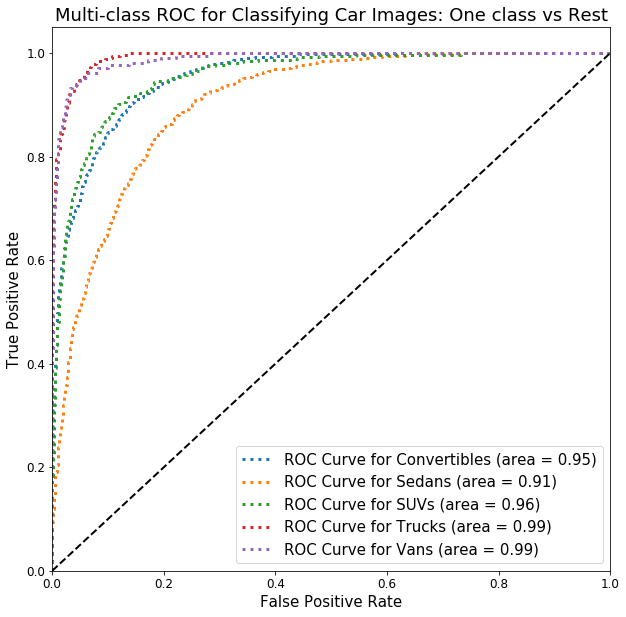

In [27]:
# --- S1: radom sample, S2: SMOTE, S3: ADASYN

logreg_S2 = LogisticRegression(C=0.01, verbose=True, solver="saga", multi_class = "multinomial", max_iter=1000) # C: Inverse of regularization strength; 
logreg_S2.fit(X500_S2, y_S2)

ytest_labels_lrS2 = logreg_S2.predict(xtst_500)
ytest_prob_lrS2 = logreg_S2.predict_proba(xtst_500)
train_score_lrS2 = logreg_S2.score(Xtrn_500, Ytrn)
test_score_lrS2 = logreg_S2.score(xtst_500, ytst)
print("Train Score for the Logit Model: {:.3f}".format(train_score_lrS2))
print("Test Score for the Logit Model: {:.3f}".format(test_score_lrS2))
print("F1 score for logistic regression: {}".format(f1_score(ytst, ytest_labels_lrS2, average="macro")))
print("Confusion matrix: \n\n", confusion_matrix(ytst, ytest_labels_lrS2))

plt.rcParams['figure.figsize'] = [10, 10]
create_ROC_Curves(ytst, ytest_prob_lrS2, classes=[1, 2, 3, 4, 5])

/Users/bhanuyerra/Documents/MetisDatScienceBootcamp/Projects/Metis_Prj3/Code/CarsModelClass.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fileNames_df.sort_values(str(int(yfalse)), ascending=False, inplace=True)


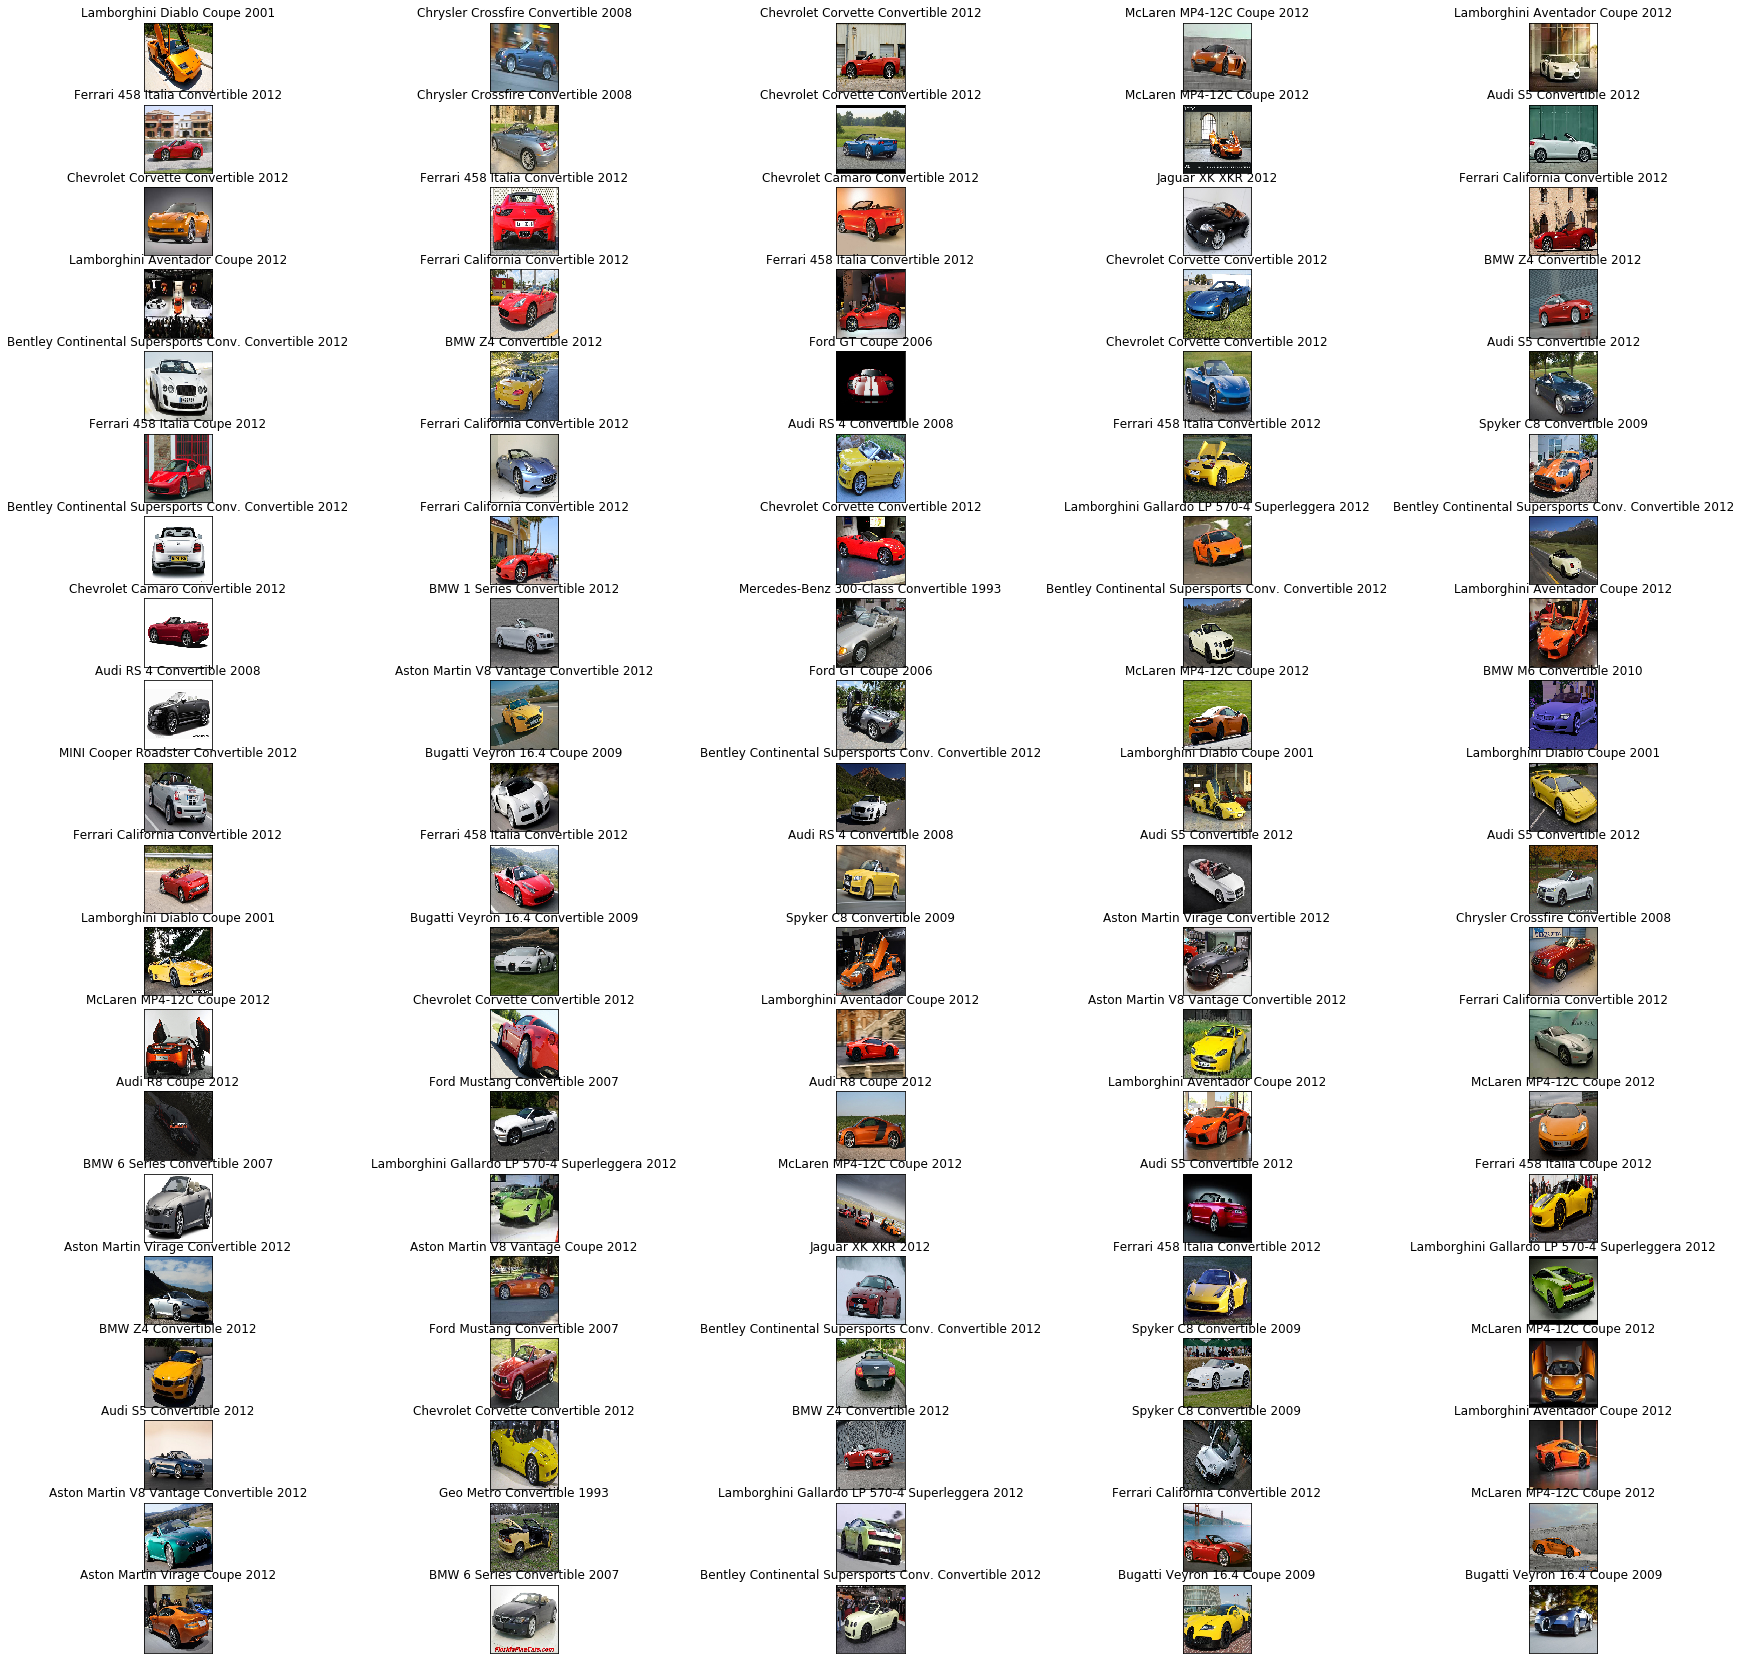

In [29]:
top20_lrS2 = cars_model.get_misclass_topFileNames(ytest_labels_lrS2, ytest_prob_lrS2, 1, 1, 100)
GetStandfordCars().show_select_images(top20_lrS2)

Train Score for the Logit Model: 0.976
Test Score for the Logit Model: 0.730
F1 score for logistic regression: 0.7465412608634757
Confusion matrix: 

 [[809 207  10   4   1]
 [220 676 115  12  23]
 [ 21  92 433  37  36]
 [  6   2  46 270   7]
 [  3  10  19   3 175]]


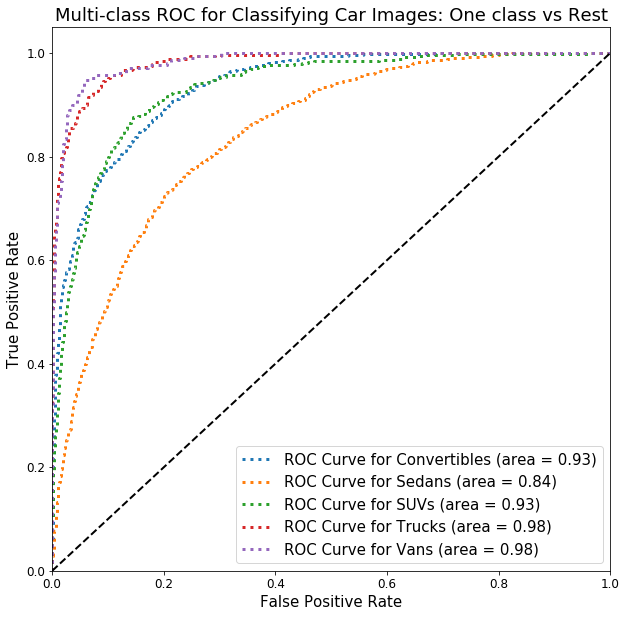

In [28]:
randomforest_S2 = RandomForestClassifier(n_estimators=500, max_depth=10, random_state = 333)
randomforest_S2.fit(X500_S2, y_S2)

ytest_labels_rfS2 = randomforest_S2.predict(xtst_500)
ytest_prob_rfS2 = randomforest_S2.predict_proba(xtst_500)
train_score_rfS2 = randomforest_S2.score(Xtrn_500, Ytrn)
test_score_rfS2 = randomforest_S2.score(xtst_500, ytst)
print("Train Score for the Logit Model: {:.3f}".format(train_score_rfS2))
print("Test Score for the Logit Model: {:.3f}".format(test_score_rfS2))
print("F1 score for logistic regression: {}".format(f1_score(ytst, ytest_labels_rfS2, average="macro")))
print("Confusion matrix: \n\n", confusion_matrix(ytst, ytest_labels_rfS2))

plt.rcParams['figure.figsize'] = [10, 10]
create_ROC_Curves(ytst, ytest_prob_rfS2, classes=[1, 2, 3, 4, 5])

In [30]:
from sklearn.model_selection import RandomizedSearchCV

Train Score for the Logit Model: 1.000
Test Score for the Logit Model: 0.721
F1 score for logistic regression: 0.7430480546281647
Confusion matrix: 

 [[799 216  14   2   0]
 [238 693  96   5  14]
 [ 19 125 429  26  20]
 [  7   7  61 254   2]
 [  2  13  33   2 160]]


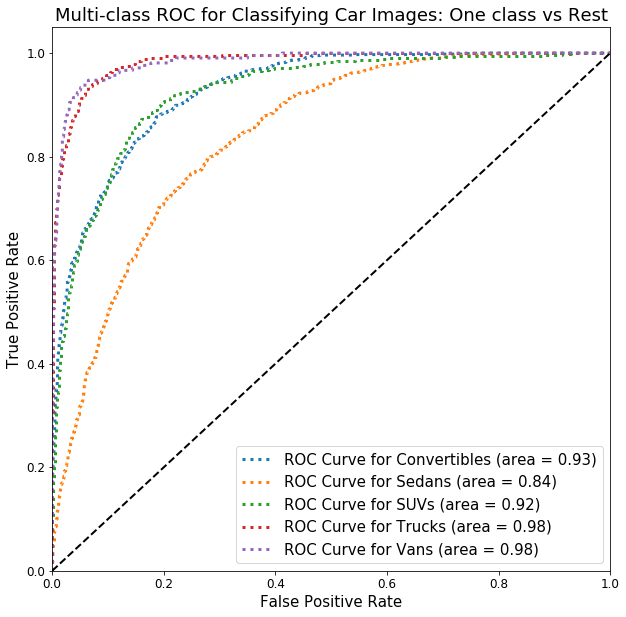

In [45]:
randomforest_S2b = RandomForestClassifier(n_estimators=200, max_depth=20, oob_score=True, random_state = 333)
randomforest_S2b.fit(X500_S2, y_S2)

ytest_labels_rfS2b = randomforest_S2b.predict(xtst_500)
ytest_prob_rfS2b = randomforest_S2b.predict_proba(xtst_500)
train_score_rfS2b = randomforest_S2b.score(X500_S2, y_S2)
test_score_rfS2b = randomforest_S2b.score(xtst_500, ytst)
print("Train Score for the Logit Model: {:.3f}".format(train_score_rfS2b))
print("Test Score for the Logit Model: {:.3f}".format(test_score_rfS2b))
print("F1 score for logistic regression: {}".format(f1_score(ytst, ytest_labels_rfS2b, average="macro")))
print("Confusion matrix: \n\n", confusion_matrix(ytst, ytest_labels_rfS2b))

plt.rcParams['figure.figsize'] = [10, 10]
create_ROC_Curves(ytst, ytest_prob_rfS2b, classes=[1, 2, 3, 4, 5])

In [34]:
randomforest_S2b.oob_score_

0.824522659305268

In [42]:
from sklearn.neural_network import MLPClassifier

nnet = MLPClassifier(hidden_layer_sizes = ()random_state = 333, verbose = True, early_stopping = True)
nnet.fit(Xtrn_500, Ytrn)

Iteration 1, loss = 1.03403200
Validation score: 0.739768
Iteration 2, loss = 0.57105437
Validation score: 0.779151
Iteration 3, loss = 0.46515789
Validation score: 0.789189
Iteration 4, loss = 0.40326079
Validation score: 0.796139
Iteration 5, loss = 0.35747603
Validation score: 0.800000
Iteration 6, loss = 0.31753410
Validation score: 0.800772
Iteration 7, loss = 0.28348323
Validation score: 0.805405
Iteration 8, loss = 0.25115117
Validation score: 0.807722
Iteration 9, loss = 0.22166413
Validation score: 0.800772
Iteration 10, loss = 0.19450643
Validation score: 0.804633
Iteration 11, loss = 0.16996469
Validation score: 0.799228
Iteration 12, loss = 0.14742343
Validation score: 0.806178
Iteration 13, loss = 0.12733317
Validation score: 0.806178
Iteration 14, loss = 0.10961247
Validation score: 0.806178
Iteration 15, loss = 0.09391970
Validation score: 0.810811
Iteration 16, loss = 0.08055790
Validation score: 0.809266
Iteration 17, loss = 0.06900528
Validation score: 0.811583
Iterat

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=333, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

Train Score for the Logit Model: 0.982
Test Score for the Logit Model: 0.797
F1 score for logistic regression: 0.8136043050669309
Confusion matrix: 

 [[860 165   2   2   2]
 [180 770  75   5  16]
 [  9  77 497  20  16]
 [  1   7  42 278   3]
 [  4  19  11   0 176]]


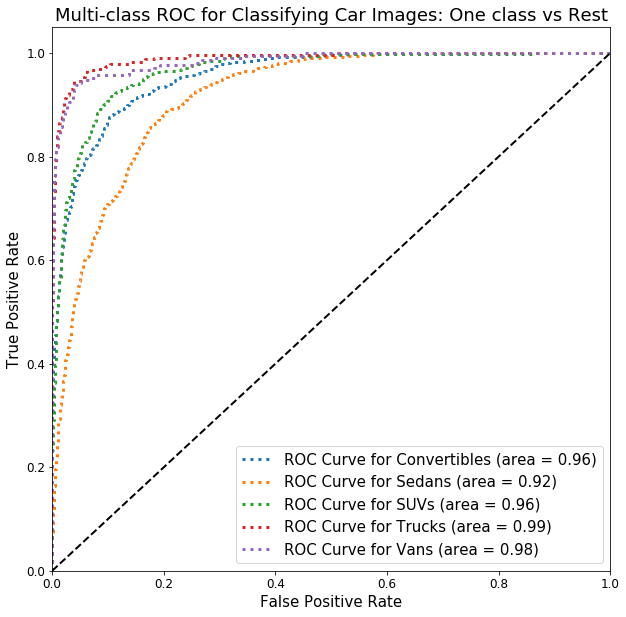

In [46]:
ytest_labels_nnet = nnet.predict(xtst_500)
ytest_prob_nnet = nnet.predict_proba(xtst_500)
train_score_nnet = nnet.score(Xtrn_500, Ytrn)
test_score_nnet = nnet.score(xtst_500, ytst)
print("Train Score for the Logit Model: {:.3f}".format(train_score_nnet))
print("Test Score for the Logit Model: {:.3f}".format(test_score_nnet))
print("F1 score for logistic regression: {}".format(f1_score(ytst, ytest_labels_nnet, average="macro")))
print("Confusion matrix: \n\n", confusion_matrix(ytst, ytest_labels_nnet))

plt.rcParams['figure.figsize'] = [10, 10]
create_ROC_Curves(ytst, ytest_prob_nnet, classes=[1, 2, 3, 4, 5])

Iteration 1, loss = 0.72943889
Validation score: 0.755985
Iteration 2, loss = 0.54093775
Validation score: 0.792278
Iteration 3, loss = 0.44287175
Validation score: 0.796139
Iteration 4, loss = 0.39195730
Validation score: 0.797683
Iteration 5, loss = 0.32658566
Validation score: 0.827027
Iteration 6, loss = 0.28337584
Validation score: 0.806950
Iteration 7, loss = 0.19702052
Validation score: 0.813900
Iteration 8, loss = 0.15851067
Validation score: 0.773745
Iteration 9, loss = 0.15659998
Validation score: 0.803861
Iteration 10, loss = 0.08610970
Validation score: 0.814672
Iteration 11, loss = 0.07518604
Validation score: 0.810811
Iteration 12, loss = 0.05052102
Validation score: 0.817761
Iteration 13, loss = 0.03308588
Validation score: 0.817761
Iteration 14, loss = 0.04192293
Validation score: 0.822394
Iteration 15, loss = 0.03444495
Validation score: 0.815444
Iteration 16, loss = 0.04080597
Validation score: 0.811583
Validation score did not improve more than tol=0.000100 for 10 co

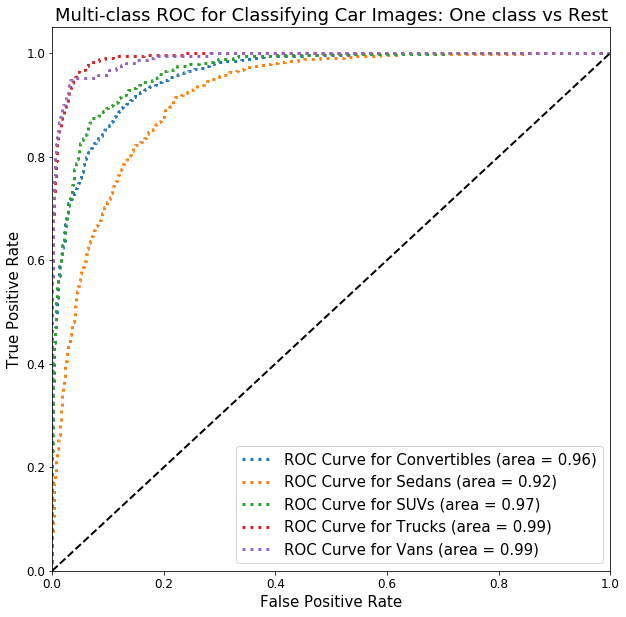

In [47]:
nnet2 = MLPClassifier(hidden_layer_sizes = (640, 320, 160), random_state = 333, verbose = True, early_stopping = True)
nnet2.fit(Xtrn, Ytrn)

ytest_labels_nnet2 = nnet2.predict(xtst)
ytest_prob_nnet2 = nnet2.predict_proba(xtst)
train_score_nnet2 = nnet2.score(Xtrn, Ytrn)
test_score_nnet2 = nnet2.score(xtst, ytst)
print("Train Score for the Logit Model: {:.3f}".format(train_score_nnet2))
print("Test Score for the Logit Model: {:.3f}".format(test_score_nnet2))
print("F1 score for logistic regression: {}".format(f1_score(ytst, ytest_labels_nnet2, average="macro")))
print("Confusion matrix: \n\n", confusion_matrix(ytst, ytest_labels_nnet2))

plt.rcParams['figure.figsize'] = [10, 10]
create_ROC_Curves(ytst, ytest_prob_nnet2, classes=[1, 2, 3, 4, 5])

In [76]:
top20_nnet2 = cars_model.get_misclass_topFileNames(ytest_labels_nnet2, ytest_prob_nnet2, 2, 1, 30, top=False)
GetStandfordCars().show_select_images(top20_nnet2)

TypeError: get_misclass_topFileNames() got an unexpected keyword argument 'top'

In [66]:
dump(nnet2, "../Models/MobileNetV2/MLPClass_5Class.joblib")

['../Models/MobileNetV2/MLPClass_5Class.joblib']

In [75]:
nnet2 = load("../Models/MobileNetV2/MLPClass_5Class.joblib")

## Regularized Logistic Regression with StandardScaler

In [9]:
from sklearn.preprocessing import StandardScaler
#cars_model = cars_model_class(no_of_classes=5)   
#Xtrn = cars_model.Xtrain
#xtst = cars_model.xtest
#Ytrn = cars_model.Ytrain
#ytst = cars_model.ytest
scaler = StandardScaler()
Xtrn_s = scaler.fit_transform(Xtrn)
xtst_s = scaler.transform(xtst)

cars_PCA = PCA(n_components=500)
Xtrn_500 = cars_PCA.fit_transform(Xtrn_s)
xtst_500 = cars_PCA.transform(xtst_s)
print(np.sum(cars_PCA.explained_variance_ratio_))

logreg = LogisticRegression(C=0.01, verbose=True, solver="saga", max_iter=1000, multi_class="multinomial") # C: Inverse of regularization strength; 
logreg.fit(Xtrn_500, Ytrn)

0.8645518858952768


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 948 epochs took 129 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min finished


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=True,
                   warm_start=False)

Train Score for the Logit Model: 0.832
Test Score for the Logit Model: 0.780
F1 score for logistic regression: 0.7957010544958582
Confusion matrix: 

 [[824 196   9   1   1]
 [191 779  59   6  11]
 [ 10  79 481  32  17]
 [  3   6  45 273   4]
 [  5  17  19   1 168]]


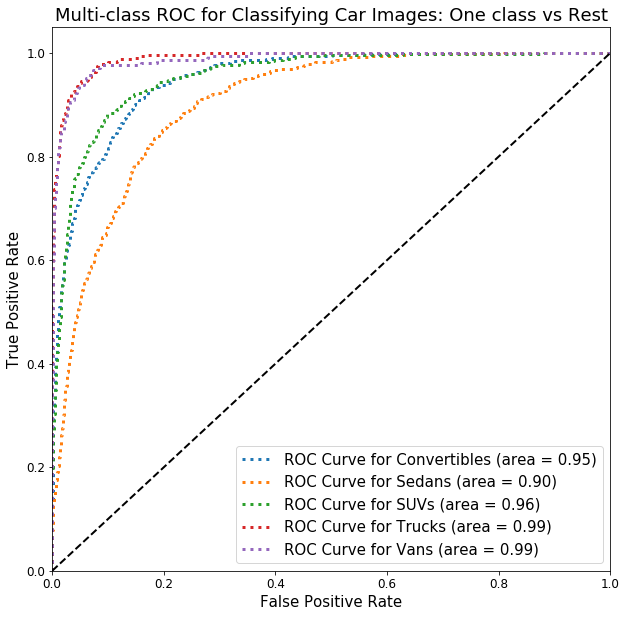

In [10]:
ytest_labels = logreg.predict(xtst_500)
ytest_prob = logreg.predict_proba(xtst_500)
train_score = logreg.score(Xtrn_500, Ytrn)
test_score = logreg.score(xtst_500, ytst)
print("Train Score for the Logit Model: {:.3f}".format(train_score))
print("Test Score for the Logit Model: {:.3f}".format(test_score))
print("F1 score for logistic regression: {}".format(f1_score(ytst, ytest_labels, average="macro")))
print("Confusion matrix: \n\n", confusion_matrix(ytst, ytest_labels))

plt.rcParams['figure.figsize'] = [10, 10]
create_ROC_Curves(ytst, ytest_prob, classes=[1, 2, 3, 4, 5])

## Regularized Support Vectore Machine Classifier w/ StandardScaler

In [11]:
cars_svc = SVC(C=0.01, kernel='poly', gamma='auto', probability=True, verbose=True)
cars_svc.fit(Xtrn_500, Ytrn)

[LibSVM]

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=True)

Train Score for the Logit Model: 0.635
Test Score for the Logit Model: 0.593
F1 score for logistic regression: 0.5785737806044515
Confusion matrix: 

 [[ 498  530    0    1    2]
 [  28 1016    2    0    0]
 [   2  466  142    2    7]
 [   0  138   35  158    0]
 [   0   92   14    0  104]]


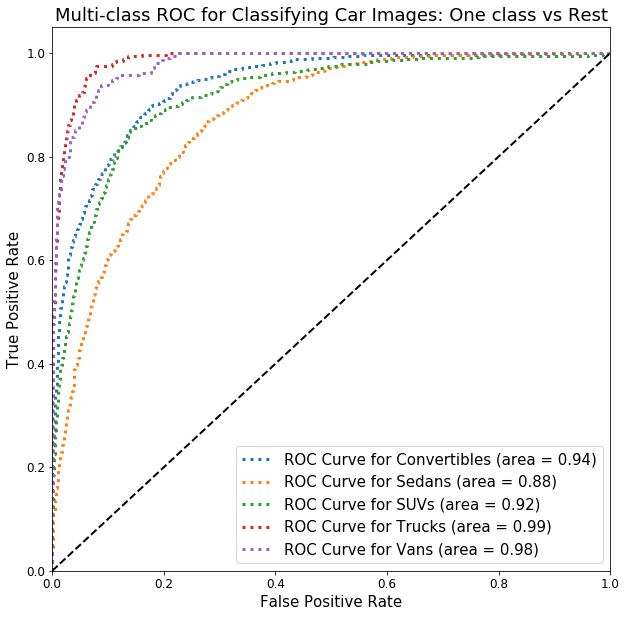

In [12]:
ytl_svc = cars_svc.predict(xtst_500)
ytp_svc = cars_svc.predict_proba(xtst_500)
train_score_svc = cars_svc.score(Xtrn_500, Ytrn)
test_score_svc = cars_svc.score(xtst_500, ytst)
print("Train Score for the Logit Model: {:.3f}".format(train_score_svc))
print("Test Score for the Logit Model: {:.3f}".format(test_score_svc))
print("F1 score for logistic regression: {}".format(f1_score(ytst, ytl_svc, average="macro")))
print("Confusion matrix: \n\n", confusion_matrix(ytst, ytl_svc))

plt.rcParams['figure.figsize'] = [10, 10]
create_ROC_Curves(ytst, ytp_svc, classes=[1, 2, 3, 4, 5])

In [13]:
dump(cars_svc, "../Models/MobileNetV2/SVM_svalesC0.01_5Class.joblib")

['../Models/MobileNetV2/SVM_svalesC0.01_5Class.joblib']

## eXtreme Grandient Boosted Tree Classifier

In [17]:
from xgboost import XGBClassifier
clf = XGBClassifier(max_depth=10,n_estimators=100).fit(Xtrn_500, Ytrn)

Train Score for the XGB Model: 1.000
Test Score for the XGB Model: 0.747
F1 score for XGB: 0.7624826499498413
Confusion matrix: 

 [[811 206   9   5   0]
 [191 772  72   6   5]
 [ 15 136 426  27  15]
 [  4   7  67 253   0]
 [  0  28  23   3 156]]


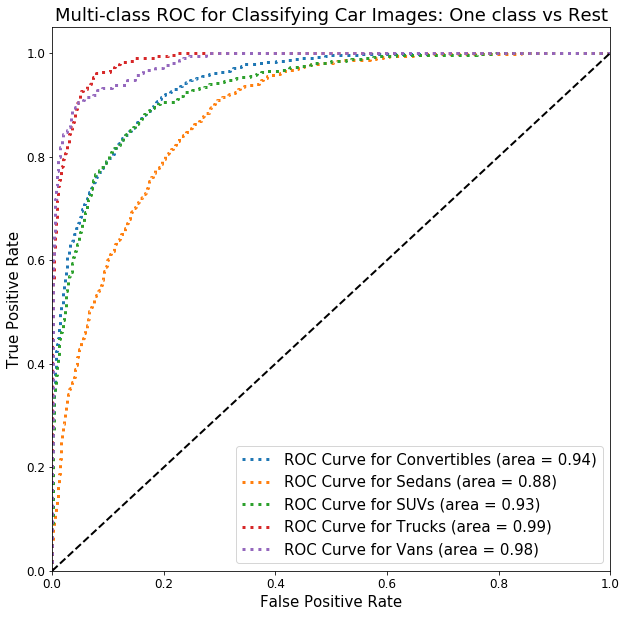

In [18]:
ytl_xgb = clf.predict(xtst_500)
ytp_xgb = clf.predict_proba(xtst_500)
train_score_xgb = clf.score(Xtrn_500, Ytrn)
test_score_xgb = clf.score(xtst_500, ytst)
print("Train Score for the XGB Model: {:.3f}".format(train_score_xgb))
print("Test Score for the XGB Model: {:.3f}".format(test_score_xgb))
print("F1 score for XGB: {}".format(f1_score(ytst, ytl_xgb, average="macro")))
print("Confusion matrix: \n\n", confusion_matrix(ytst, ytl_xgb))

plt.rcParams['figure.figsize'] = [10, 10]
create_ROC_Curves(ytst, ytp_xgb, classes=[1, 2, 3, 4, 5])

In [19]:
dump(clf, "../Models/MobileNetV2/XGB_10deep100est_5Class.joblib")

['../Models/MobileNetV2/XGB_10deep100est_5Class.joblib']

In [20]:
from mlxtend.classifier import StackingClassifier